<a href="https://colab.research.google.com/github/Kaveriharamagatti/NVIDIA_async_detection/blob/main/Methodology_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

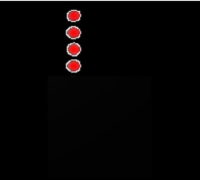

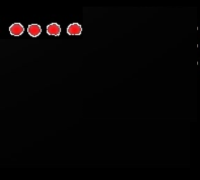

In [ ]:
# resizing
import os
from google.colab.patches import cv2_imshow
import cv2

# Function to resize images in a directory
def resize_images(input_folder, output_folder, desired_width, desired_height):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all files in the input folder
    image_files = os.listdir(input_folder)

    # Resize each image and save it in the output folder
    for file_name in image_files:
        # Read the image
        image_path = os.path.join(input_folder, file_name)
        image = cv2.imread(image_path)

        # Resize the image
        resized_image = cv2.resize(image, (desired_width, desired_height))

        # Save the resized image to the output folder with .jpg extension
        output_path = os.path.join(output_folder, file_name[:-4] + ".jpg")  # Change file extension to .jpg
        cv2.imwrite(output_path, resized_image)

        # Display the resized image
        cv2_imshow(resized_image)

# Define input and output folders
input_folder = '/content/drive/MyDrive/d2'
output_folder = '/content/drive/MyDrive/cropped_output'

# Define the desired width and height
desired_width = 200
desired_height = 180

# Resize images in the input folder and save them in the output folder
resize_images(input_folder, output_folder, desired_width, desired_height)


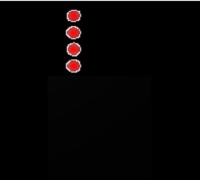

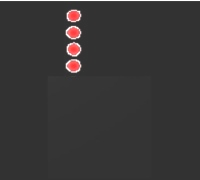

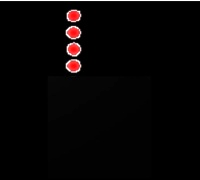

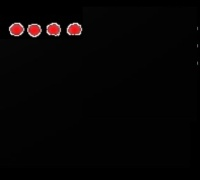

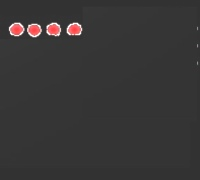

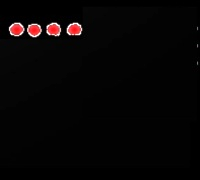

Images processed and saved successfully.


In [ ]:
#PRE-PROCESSING(ENHANCEMENT)1
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Function to perform brightness adjustment
def adjust_brightness(image, additive_value, multiplicative_factor):
    # Check if image is None
    if image is None:
        print("Error: Unable to read image.")
        return None, None

    # Additive brightness correction
    brighter_image_additive = np.clip(image.astype(np.int16) + additive_value, 0, 255).astype(np.uint8)

    # Multiplicative brightness correction
    brighter_image_multiplicative = np.clip(image.astype(np.float32) * multiplicative_factor, 0, 255).astype(np.uint8)

    return brighter_image_additive, brighter_image_multiplicative

# Read the images
image_paths = ['/content/drive/MyDrive/cropped_output/1.jpg', '/content/drive/MyDrive/cropped_output/2.jpg']
output_folder = '/content/drive/MyDrive/output_nvidia/'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the amount of brightness adjustment
additive_value = 50  # Positive value for brighter, negative for darker
multiplicative_factor = 1.25  # Greater than 1 for brighter, between 0 and 1 for darker

# Process each image
for i, image_path in enumerate(image_paths):
    # Read the image
    image = cv2.imread(image_path)

    # Perform brightness adjustment
    brighter_image_additive, brighter_image_multiplicative = adjust_brightness(image, additive_value, multiplicative_factor)

    if brighter_image_additive is None or brighter_image_multiplicative is None:
        continue

    # Display the original and corrected images
    cv2_imshow(image)
    cv2_imshow(brighter_image_additive)
    cv2_imshow(brighter_image_multiplicative)

    # Save the corrected images in the output folder
    cv2.imwrite(os.path.join(output_folder, 'brighter_image_additive_{}.png'.format(i+1)), brighter_image_additive)
    cv2.imwrite(os.path.join(output_folder, 'brighter_image_multiplicative_{}.png'.format(i+1)), brighter_image_multiplicative)

print("Images processed and saved successfully.")


In [ ]:
#RETAINING ONLY RED AND WHITE SEGMENTS1
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

# Function to process image
def process_image(image_path, output_folder):
    # Load the image
    image = cv2.imread(image_path)

    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for red color
    lower_red = np.array([0, 50, 0])
    upper_red = np.array([255, 255, 255])

    # Mask to extract red regions
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Define lower and upper bounds for white color
    lower_white = np.array([0, 100, 225])
    upper_white = np.array([220, 30, 255])

    # Mask to extract white regions
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Combine masks
    mask = cv2.bitwise_or(mask_red, mask_white)

    # Apply mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Save the result
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, result)
    print(f"Processed image saved: {output_path}")

# Input image paths
image_paths = [
    '/content/drive/MyDrive/output_nvidia/brighter_image_multiplicative_1.png',
    '/content/drive/MyDrive/output_nvidia/brighter_image_multiplicative_2.png'
]

# Output folder
output_folder = '/content/drive/MyDrive/pre_preocessed'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image
for image_path in image_paths:
    process_image(image_path, output_folder)



Processed image saved: /content/drive/MyDrive/pre_preocessed/brighter_image_multiplicative_1.png
Processed image saved: /content/drive/MyDrive/pre_preocessed/brighter_image_multiplicative_2.png


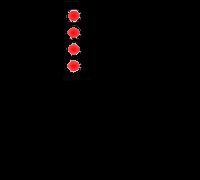

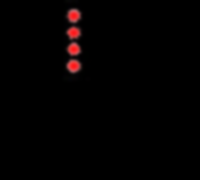

Filtered image 1 saved to: /content/drive/MyDrive/pre_preocessed/filtered_image_1_brighter_image_multiplicative_1.png


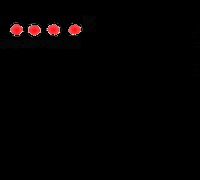

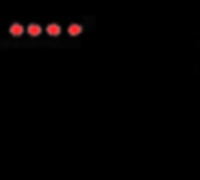

Filtered image 2 saved to: /content/drive/MyDrive/pre_preocessed/filtered_image_2_brighter_image_multiplicative_2.png


In [ ]:
#LOW PASS FILTER
import cv2
import os
from google.colab.patches import cv2_imshow

def low_pass_filter(image, kernel_size):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred

def main(image_paths, output_folder):
    # Set the kernel size for Gaussian blur
    kernel_size = 7

    # Create the output directory if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Process each image
    for i, image_path in enumerate(image_paths):
        # Read the input image
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is None:
            print(f"Error: Unable to read image at path: {image_path}")
            continue

        # Apply low-pass filter
        filtered_image = low_pass_filter(image, kernel_size)

        # Display the original image and the filtered image
        cv2_imshow(image)
        cv2_imshow(filtered_image)

        # Save the filtered image to the output directory
        filename = os.path.basename(image_path)
        output_path = os.path.join(output_folder, f'filtered_image_{i+1}_{filename}')
        cv2.imwrite(output_path, filtered_image)
        print(f"Filtered image {i+1} saved to: {output_path}")


if __name__ == "__main__":
    # Input image paths
    image_paths = [
        '/content/drive/MyDrive/pre_preocessed/brighter_image_multiplicative_1.png',
        '/content/drive/MyDrive/pre_preocessed/brighter_image_multiplicative_2.png'
    ]

    # Output folder
    output_folder = '/content/drive/MyDrive/pre_preocessed'

    # Call the main function with input image paths and output folder
    main(image_paths, output_folder)


Edge-detected image saved to: /content/drive/MyDrive/output_nvidia/edges_filtered_image_1_brighter_image_multiplicative_1.png


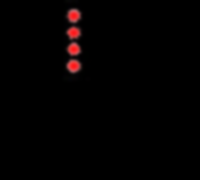

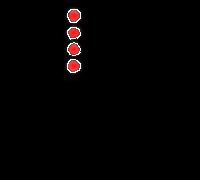

Edge-detected image saved to: /content/drive/MyDrive/output_nvidia/edges_filtered_image_2_brighter_image_multiplicative_2.png


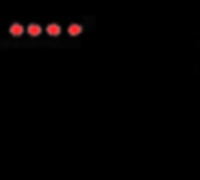

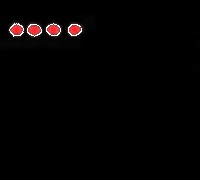

In [ ]:
#EDGE MAPPING
from google.colab.patches import cv2_imshow
import cv2
import os

# Function to apply edge detection and save the result
def apply_edge_detection(image_path, output_folder):
    # Read the image
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is None:
        print(f"Error: Unable to read image at path: {image_path}")
        return

    # Convert the original image to grayscale
    gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Perform Canny edge detection to detect edges
    edges = cv2.Canny(gray, 50, 150)

    # Retain the original color and intensity of the image after edge detection
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    result = cv2.addWeighted(original_image, 1, edges_rgb, 1, 0)

    # Save the result
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, f'edges_{filename}')
    cv2.imwrite(output_path, result)
    print(f"Edge-detected image saved to: {output_path}")

    # Display the original and edge-detected images
    cv2_imshow(original_image)
    cv2_imshow(result)

# Input image paths
image_paths = [
    '/content/drive/MyDrive/pre_preocessed/filtered_image_1_brighter_image_multiplicative_1.png',
    '/content/drive/MyDrive/pre_preocessed/filtered_image_2_brighter_image_multiplicative_2.png'
]

# Output folder
output_folder = '/content/drive/MyDrive/output_nvidia'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image
for image_path in image_paths:
    apply_edge_detection(image_path, output_folder)


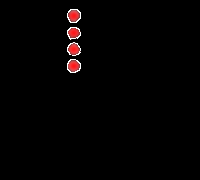

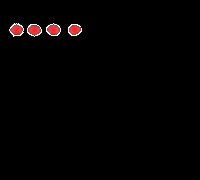

In [ ]:
#REMOVING BACKGROUND
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

def segment_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform image thresholding (adjust parameters as needed)
    _, thresholded_image = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to retain only the segmented part
    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, contours, -1, (255), cv2.FILLED)

    # Apply the mask to the original image to extract the segmented part
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    return segmented_image

def main():
    # Path to the input images
    image_path = '/content/drive/MyDrive/output_nvidia/edges_filtered_image_1_brighter_image_multiplicative_1.png'
    image_path1 = '/content/drive/MyDrive/output_nvidia/edges_filtered_image_2_brighter_image_multiplicative_2.png'

    # Perform image segmentation
    segmented_image = segment_image(image_path)
    segmented_image1 = segment_image(image_path1)

    # Display the segmented images
    cv2_imshow(segmented_image)
    cv2_imshow(segmented_image1)

    # Create a folder to save the segmented images
    output_folder = '/content/drive/MyDrive/output_nvidia1'
    os.makedirs(output_folder, exist_ok=True)

    # Save the segmented images
    cv2.imwrite(os.path.join(output_folder, 'segmented_image1.jpg'), segmented_image)
    cv2.imwrite(os.path.join(output_folder, 'segmented_image2.jpg'), segmented_image1)

if __name__ == "__main__":
    main()


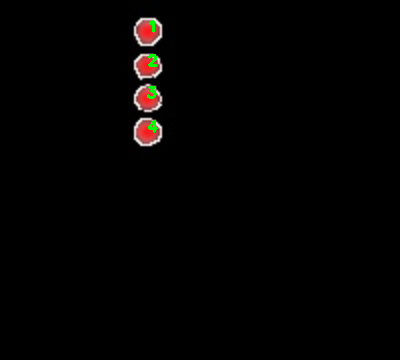

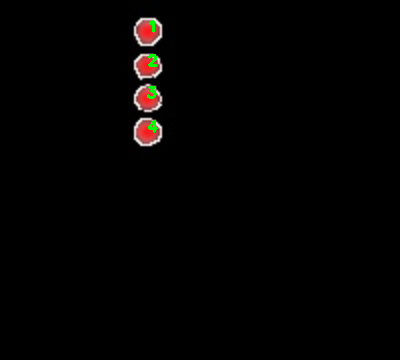

The position of assigned numbers is the same.
Number of LEDs in Image 1: 4
Number of LEDs in Image 2: 4


In [ ]:
#checking for async
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def assign_numbers_to_high_intensity_regions(image_path1, image_path2, output_folder):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Enlarge the images (scaling factor = 2)
    scale_factor = 2
    enlarged_image1 = cv2.resize(image1, None, fx=scale_factor, fy=scale_factor)
    enlarged_image2 = cv2.resize(image2, None, fx=scale_factor, fy=scale_factor)

    # Convert enlarged images to grayscale
    gray1 = cv2.cvtColor(enlarged_image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(enlarged_image2, cv2.COLOR_BGR2GRAY)

    # Thresholding to segment high intensity regions
    _, binary1 = cv2.threshold(gray1, 210, 255, cv2.THRESH_BINARY)
    _, binary2 = cv2.threshold(gray2, 210, 255, cv2.THRESH_BINARY)

    # Thresholding to segment red regions
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([100, 255, 255])
    red_mask1 = cv2.inRange(enlarged_image1, lower_red, upper_red)
    red_mask2 = cv2.inRange(enlarged_image2, lower_red, upper_red)

    # Combine masks
    combined_mask1 = cv2.bitwise_or(binary1, red_mask1)
    combined_mask2 = cv2.bitwise_or(binary2, red_mask2)

    # Find contours in the combined masks
    contours1, _ = cv2.findContours(combined_mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(combined_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create copies of the original images to draw the segmented regions
    segmented_image1 = enlarged_image1.copy()
    segmented_image2 = enlarged_image2.copy()

    # Assign numbers to segmented regions for image 1
    segment_numbers1 = {}
    row_number = 1
    for contour in sorted(contours1, key=lambda x: cv2.boundingRect(x)[1]):  # Sort contours by y-coordinate
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # If the area is sufficiently large, consider it as a segmented region
        if area > 25:  # Adjust this threshold based on your requirements
            # Calculate centroid
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                # Add a text label with the segment number and row number
                segment_numbers1[(row_number, cX)] = len(segment_numbers1) + 1
                # Draw the text in green color
                cv2.putText(segmented_image1, str(segment_numbers1[(row_number, cX)]), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        # Check if contour has moved to the next row
        if cv2.boundingRect(contour)[1] > (row_number * 25):
            row_number += 1

    # Assign numbers to segmented regions for image 2
    segment_numbers2 = {}
    row_number = 1
    for contour in sorted(contours2, key=lambda x: cv2.boundingRect(x)[1]):  # Sort contours by y-coordinate
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # If the area is sufficiently large, consider it as a segmented region
        if area > 25:  # Adjust this threshold based on your requirements
            # Calculate centroid
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                # Add a text label with the segment number and row number
                segment_numbers2[(row_number, cX)] = len(segment_numbers2) + 1
                # Draw the text in green color
                cv2.putText(segmented_image2, str(segment_numbers2[(row_number, cX)]), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        # Check if contour has moved to the next row
        if cv2.boundingRect(contour)[1] > (row_number * 25):
            row_number += 1

    # Count the number of LEDs in each image
    num_leds1 = len(segment_numbers1)
    num_leds2 = len(segment_numbers2)

    # Write the output to text files
    output_path1 = os.path.join(output_folder, "segmented_image1.jpg")
    output_path2 = os.path.join(output_folder, "segmented_image2.jpg")

    # Save the segmented images with assigned numbers
    cv2.imwrite(output_path1, segmented_image1)
    cv2.imwrite(output_path2, segmented_image2)

    # Display the segmented images with numbers assigned to regions
    cv2_imshow(segmented_image1)
    cv2_imshow(segmented_image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print asynchronous or compare positions
    if num_leds1 != num_leds2:
        print("Async")
    else:
        if segment_numbers1 == segment_numbers2:
            print("The position of assigned numbers is the same.")
        else:
            print("The position of assigned numbers is different.")

    print("Number of LEDs in Image 1:", num_leds1)
    print("Number of LEDs in Image 2:", num_leds2)

# Example usage
image_path1 = '/content/drive/MyDrive/output_nvidia1/segmented_image1.jpg'
image_path2 = '/content/drive/MyDrive/output_nvidia1/segmented_image1.jpg'
output_folder = '/content/drive/MyDrive/cropped_output'

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

assign_numbers_to_high_intensity_regions(image_path1, image_path2, output_folder)
